# 랜덤포레스트 사용하기
- 앙상블 기법: 트리를 여러 개 사용하면 성능이 더 좋아질 것이다.

In [3]:
import pandas as pd

# load data
df = pd.read_csv("../data/diabetes_feature.csv")

X = df[['Glucose', 'BloodPressure', 'SkinThickness',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
        'Insulin_nan', 'low_glu_insulin']]
y = df['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print(f"DecisionTreeClassifier's accuracy {model.score(X_test, y_test)}")

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)
print(f"RandomForestClassifier's accuracy {model.score(X_test, y_test)}")

DecisionTreeClassifier's accuracy 0.8181818181818182
RandomForestClassifier's accuracy 0.8701298701298701


In [20]:
# RandomForestClassifier는 기본적으로 tree가 100개이다.
# -> 그렇기 때문에 tree를 시각화하기가 쉽지않다.
RandomForestClassifier().n_estimators


100

<Axes: >

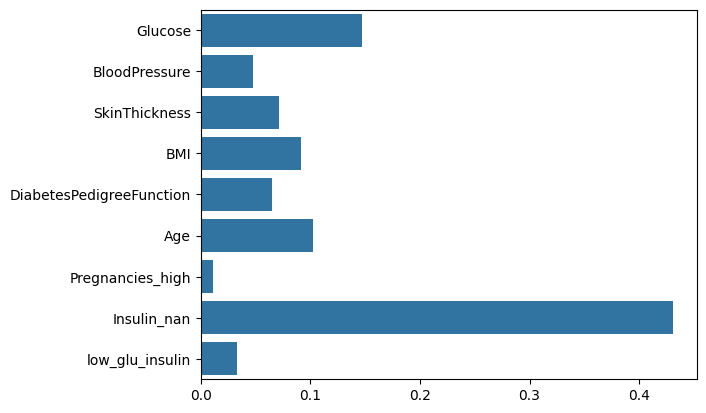

In [14]:
import seaborn as sns

sns.barplot(x=model.feature_importances_, y=X.columns.tolist())


- DecisionTree를 통해서 feature engineering을 하고
- 앞서 전처리된 feature를 통해 알고리즘 별로 성능을 파악한다.


# 그라디언트 부스팅 알고리즘 사용하기

- bagging: 트리를 여러 개를 샘플링해서 사용
- boosting: 샘플링 결과값에 가중치를 적용하여 다음 샘플링 때 사용한다

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import set_config

set_config(print_changed_only=False)

model = GradientBoostingClassifier(random_state=42)
print(model)

model.fit(X_train, y_train)
model.score(X_test, y_test)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


0.8441558441558441

<Axes: >

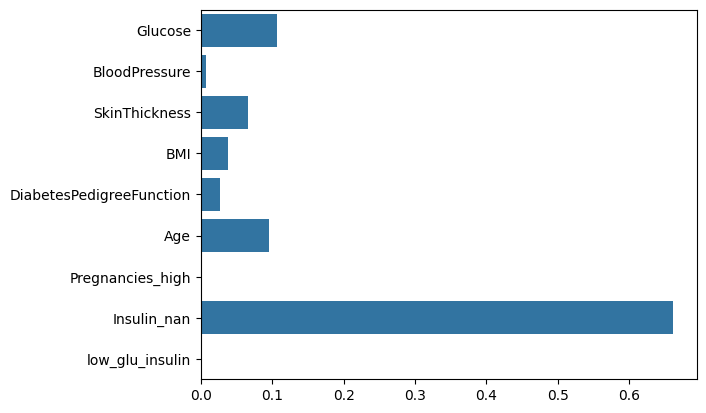

In [22]:
sns.barplot(x=model.feature_importances_, y=X.columns.tolist())


# RamdomSearchCV 로 여러 알고리즘의 최적의 하이퍼 파라미터를 찾기


## 단일 estimator

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

estimator = DecisionTreeClassifier(random_state=42)
param_distributions = {
    "max_depth": np.random.randint(2, 20, 10),
    "max_features": np.random.uniform(0.3, 1.0, 10),
}
clf = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_distributions,
    n_iter=100,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    verbose=2,
)
set_config(print_changed_only=False)
print(clf)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=42,
                                                    splitter='best'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth'

In [32]:
import pandas as pd

clf.fit(X_train, y_train)
display(pd.DataFrame(clf.cv_results_))
clf.best_params_, clf.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002811,0.001211,0.000681,0.000110,0.58068,17,"{'max_features': 0.580679879145777, 'max_depth...",0.821138,0.894309,0.829268,0.853659,0.860656,0.851806,0.025833,16
1,0.002122,0.001214,0.001366,0.000932,0.350678,17,"{'max_features': 0.3506775178780732, 'max_dept...",0.804878,0.886179,0.813008,0.796748,0.868852,0.833933,0.036370,82
2,0.002353,0.000943,0.000617,0.000109,0.965419,17,"{'max_features': 0.9654190494791699, 'max_dept...",0.821138,0.878049,0.796748,0.878049,0.860656,0.846928,0.032584,23
3,0.002107,0.001220,0.002272,0.003566,0.791975,17,"{'max_features': 0.7919752872846846, 'max_dept...",0.869919,0.878049,0.772358,0.845528,0.819672,0.837105,0.038263,61
4,0.004545,0.005289,0.001120,0.001179,0.523126,17,"{'max_features': 0.5231261306526916, 'max_dept...",0.837398,0.886179,0.780488,0.853659,0.868852,0.845315,0.036218,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001063,0.000104,0.000512,0.000054,0.696872,2,"{'max_features': 0.6968721151490687, 'max_dept...",0.813008,0.894309,0.796748,0.837398,0.836066,0.835506,0.033076,79
96,0.001453,0.000494,0.000691,0.000397,0.812257,2,"{'max_features': 0.8122574879114084, 'max_dept...",0.813008,0.894309,0.796748,0.788618,0.852459,0.829028,0.039350,96
97,0.001522,0.000555,0.000531,0.000088,0.825137,2,"{'max_features': 0.8251372500241185, 'max_dept...",0.813008,0.894309,0.796748,0.788618,0.852459,0.829028,0.039350,96
98,0.000978,0.000141,0.000486,0.000015,0.418711,2,"{'max_features': 0.41871120659347416, 'max_dep...",0.772358,0.869919,0.845528,0.813008,0.926230,0.845409,0.051998,29


({'max_features': 0.7919752872846846, 'max_depth': 4}, 0.8681060908969747)

## 여러 estimator


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

estimators = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
]
param_distributions = {
    "max_depth": np.random.randint(2, 20, 10),
    "max_features": np.random.uniform(0.3, 1.0, 10),
}

results = []

for estimator in estimators:
    clf = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_distributions,
        n_iter=1000,
        scoring="accuracy",
        n_jobs=-1,
        cv=20,
        verbose=2,
    )
    clf.fit(X_train, y_train)
    results.append([
        estimator.__class__.__name__,
        clf.best_params_,
        clf.best_score_,
        clf.score(X_test, y_test),
        clf.cv_results_,
    ])


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 100 is smaller than n_iter=1000. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 20 folds for each of 100 candidates, totalling 2000 fits
[CV] END .......max_depth=5, max_features=0.8025396498471578; total time=   0.0s
[CV] END .......max_depth=5, max_features=0.5787317089711879; total time=   0.0s
[CV] END .......max_depth=5, max_features=0.6648398214831202; total time=   0.0s
[CV] END .......max_depth=5, max_features=0.6648398214831202; total time=   0.0s
[CV] END .......max_depth=5, max_features=0.9444035644219839; total time=   0.0s
[CV] END .......max_depth=5, max_features=0.9444035644219839; total time=   0.0s
[CV] END .......max_depth=5, max_features=0.7287782562378511; total time=   0.0s
[CV] END .......max_depth=5, max_features=0.7287782562378511; total time=   0.0s
[CV] END ......max_depth=17, max_features=0.8133631759608158; total time=   0.0s
[CV] END ......max_depth=17, max_features=0.8133631759608158; total time=   0.0s
[CV] END ......max_depth=17, max_features=0.7796974648805188; total time=   0.0s
[CV] END ......max_depth=17, max_features=0.

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 100 is smaller than n_iter=1000. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ......max_depth=13, max_features=0.4153271107596116; total time=   0.1s
[CV] END .......max_depth=12, max_features=0.496027722440905; total time=   0.2s
[CV] END ......max_depth=12, max_features=0.3348274781323521; total time=   0.1s
[CV] END .....max_depth=12, max_features=0.46369958645763243; total time=   0.2s
[CV] END .....max_depth=12, max_features=0.46369958645763243; total time=   0.3s
[CV] END ......max_depth=12, max_features=0.6032973262744332; total time=   0.3s
[CV] END ......max_depth=12, max_features=0.6032973262744332; total time=   0.2s
[CV] END .......max_depth=9, max_features=0.8707969537839468; total time=   0.3s
[CV] END .......max_depth=9, max_features=0.8707969537839468; total time=   0.1s
[CV] END .......max_depth=9, max_features=0.6032973262744332; total time=   0.1s
[CV] END .......max_depth=9, max_features=0.6032973262744332; total time=   0.1s
[CV] END ......max_depth=16, max_features=0.9692605489929145; total time=   0.1s
[CV] END ......max_depth=16,

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 100 is smaller than n_iter=1000. Running 100 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7581516057921437; total time=   0.0s
[CV] END .......max_depth=8,

In [45]:
pd.DataFrame(
    results,
    columns=["estimator", "best_params", "train_score", "test_score", "cv_result"],
)


,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.7581516057921437, 'max_dept...",0.871559,0.844156,"{'mean_fit_time': [0.005553150177001953, 0.001..."
1,RandomForestClassifier,"{'max_features': 0.5864962531730326, 'max_dept...",0.910699,0.857143,"{'mean_fit_time': [0.1168657660484314, 0.14634..."
2,GradientBoostingClassifier,"{'max_features': 0.9852160070199747, 'max_dept...",0.915484,0.870130,"{'mean_fit_time': [0.0739391565322876, 0.09043..."
